In [10]:
# Import the needed libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# original, ground truth function


def func_x(x: np.ndarray):
    return np.sqrt(np.abs(x)) * np.sin(np.pi / 2 * x)


# interval
interval = [-6, 6]
# training data
input = np.array([-6, -5, -2, 0, 1, 3, 5])

# print("input", input)
output = func_x(input)
# print("Output", output)
# standard deviation
sigma_i = 1

In [11]:
# helper functions
# gaussian radial basis function
def gauss_rbf(input_x1, input_x2, sigma_i):
    return np.exp(-np.abs(input_x1 - input_x2) ** 2 / (2 * sigma_i**2))

# calculate the G matrix
def gaussian_kernel(input_x, sigma_i):
    #  initialize an empty G matrix
    size = len(input_x)
    kernel_g = np.zeros([size, size])
    for index_1 in range(size):
        for index_2 in range(size):
            # set the values in G
            kernel_g[index_1, index_2] = gauss_rbf(
                input_x[index_1], input_x[index_2], sigma_i
            )
    return kernel_g

# from notes rbf weights update model is W  = inverse(G)*D
# where D is the desired output

def rbf_weights(kernel_g, desired_output_d):
    return np.dot(np.linalg.inv(kernel_g), desired_output_d)

# calculate the final interpolation prediction using a weighted sum of gaussians

def rbf_interpolate(space, input, rbf_matrix, sigma_i):
    # initialize empty interpolation array
    interpolation = np.zeros(len(space))
    for index in range(len(rbf_matrix)):
        interpolation = interpolation + rbf_matrix[index] * gauss_rbf(
            space, input[index], sigma_i
        )
    return interpolation

Interpolated Output at X = 3.6 [-0.79923234]
True Output at X = 3.6 [-1.1152441]
Output Error at X = 3.6 [-0.31601176]
MSE: 0.35516294716873437


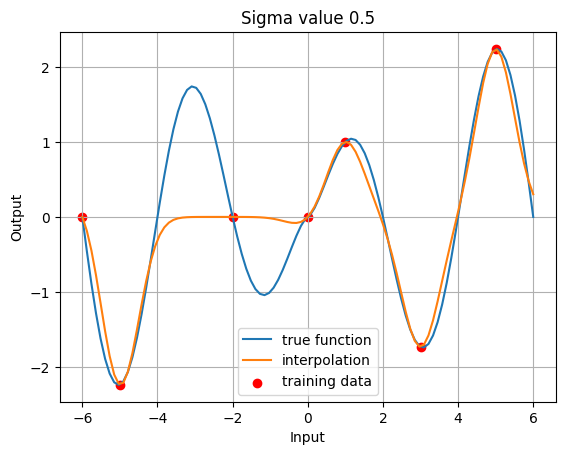

Interpolated Output at X = 3.6 [-0.93166626]
True Output at X = 3.6 [-1.1152441]
Output Error at X = 3.6 [-0.18357785]
MSE: 0.7434208466269648


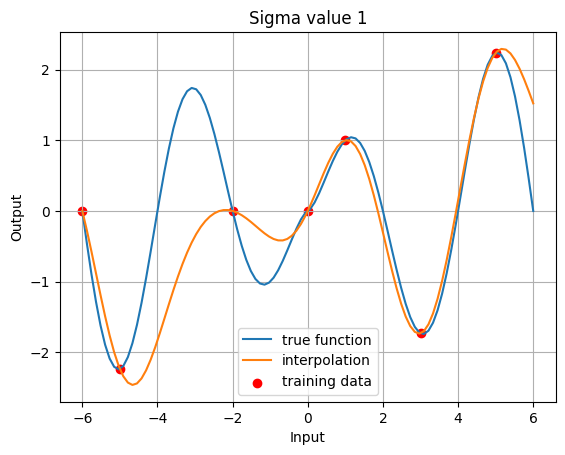

Interpolated Output at X = 3.6 [-2.4876458]
True Output at X = 3.6 [-1.1152441]
Output Error at X = 3.6 [1.3724017]
MSE: 4.4482389051313405


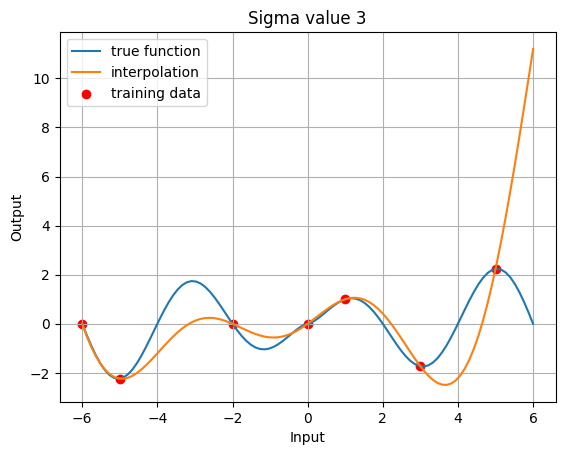

Interpolated Output at X = 3.6 [-3.33383393]
True Output at X = 3.6 [-1.1152441]
Output Error at X = 3.6 [2.21858983]
MSE: 21.115449455917492


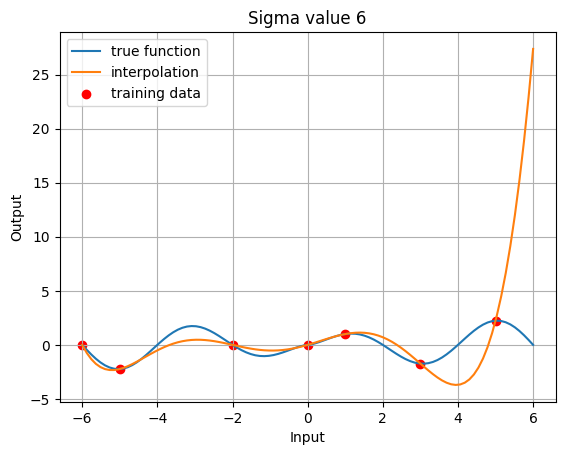

In [12]:
sigma_list = [0.5, 1, 3, 6]

# Test data
x_test = np.linspace(interval[0], interval[1], 100)
y_test = func_x(x_test)

for sigma in sigma_list:
    # calculate gaussian kernel
    kernel_g = gaussian_kernel(input, sigma)

    # calculate rbf weights
    rbf_w = rbf_weights(kernel_g, output)

    interpolation = rbf_interpolate(x_test, input, rbf_w, sigma)

    # check interpolation at x = 3.6
    interpolated_x = rbf_interpolate(np.array([3.6]), input, rbf_w, sigma)
    true_x = func_x(np.array([3.6]))
    print("Interpolated Output at X = 3.6", interpolated_x)
    print("True Output at X = 3.6", true_x)
    print("Output Error at X = 3.6", true_x - interpolated_x)

    # Plot graphs

    print("MSE:", mean_squared_error(y_test, interpolation))
    plt.plot(x_test, y_test, label="true function")
    plt.plot(x_test, interpolation, label="interpolation")
    plt.scatter(input, output, label="training data", color="red")
    plt.title(f"Sigma value {sigma}")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid()
    plt.legend()
    plt.show()